In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
import glob
import cv2
x=[]
y=[]
#/content/gdrive/MyDrive/NTI/week 4/train
cat_img = []
dog_img = []
raw_imgs = []
gray_imgs=[]
mean_value_channels=[]
edge_features =[]

###Feature Extraction using gray scale pixel

In [ ]:
from skimage.io import imread, imshow
from skimage.transform import rescale, resize, downscale_local_mean
for img in glob.glob("/content/gdrive/MyDrive/NTI/week 4/train/cat*.jpg"):
    #cat_img= cv2.imread(img,as_gray=True)
    cat_img = imread(img,as_gray=True)
    #cat_img = cv2.resize(cat_img, (128,128), interpolation = cv2.INTER_AREA)
    cat_img= resize(cat_img, (128, 128), anti_aliasing=True)
   # cat_img = cv2.cvtColor(cat_img, cv2.COLOR_BGR2GRAY)
    x.append(cat_img)
    y.append(0)
    if(len(y) == 7000):
      break

In [ ]:
for img in glob.glob("/content/gdrive/MyDrive/NTI/week 4/train/dog*.jpg"):
    #cat_img= cv2.imread(img,as_gray=True)
    dog_img = imread(img,as_gray=True)
    #cat_img = cv2.resize(cat_img, (128,128), interpolation = cv2.INTER_AREA)
    dog_img= resize(dog_img, (128, 128), anti_aliasing=True)
   # cat_img = cv2.cvtColor(cat_img, cv2.COLOR_BGR2GRAY)
    x.append(dog_img)
    y.append(1)
    if(len(y) == 14000):
      break

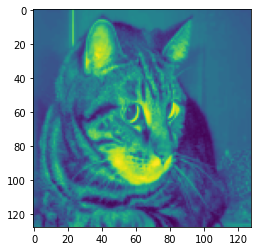

In [ ]:
plt.imshow(x[7])

In [ ]:
x[0].shape

(128, 128)

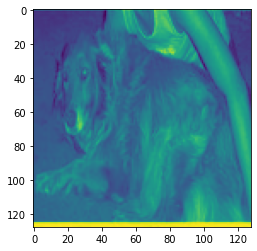

In [ ]:
plt.imshow(x[9000])

In [ ]:
len(x)

14000

In [ ]:
len(y)

14000

In [ ]:
#data = np.array(x)
lables = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(np.array(x).reshape(np.array(x).shape[0],-1), lables,test_size=0.3, random_state=42)

In [ ]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)


# fit the model to the training set
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
%%time
print(knn.score(x_test, y_test))

0.5683333333333334
CPU times: user 1min 24s, sys: 455 ms, total: 1min 25s
Wall time: 54.5 s


In [ ]:
del x_train
del x_test
del y_train
del y_test

###Feature Extraction using edge detection verticaly

In [ ]:
from skimage.filters import prewitt_h,prewitt_v
for img in x:
  #Edge Features
  #edges_prewitt_horizontal = prewitt_h(img)
  #calculating vertical edges using prewitt kernel
  edges_prewitt_vertical = prewitt_v(img)
  edge_features.append(edges_prewitt_vertical)

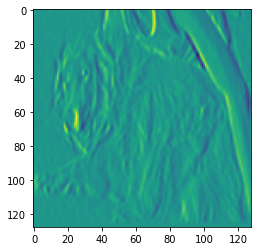

In [ ]:
plt.imshow(edge_features[9000])

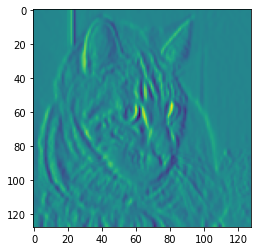

In [ ]:
plt.imshow(edge_features[7])

In [ ]:
len(x)

14000

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(np.array(edge_features).reshape(np.array(edge_features).shape[0],-1), lables,test_size=0.3, random_state=42)

In [ ]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)


# fit the model to the training set
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
%%time
print(knn.score(x_test, y_test))

0.5119047619047619
CPU times: user 1min 22s, sys: 672 ms, total: 1min 22s
Wall time: 57.3 s


In [ ]:

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=10)


# fit the model to the training set
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
%%time
print(knn.score(x_test, y_test))

0.5083333333333333
CPU times: user 1min 22s, sys: 560 ms, total: 1min 22s
Wall time: 59.7 s


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
prediction=knn.predict(x_test)

In [ ]:
accuracy_score(y_test,prediction)

0.5083333333333333

In [ ]:
del prediction

In [ ]:
del edge_features
del x_train
del x_test
del y_train
del y_test

###Feature Extraction using edge detection horizontal

In [ ]:
edge_features = []

In [ ]:
from skimage.filters import prewitt_h,prewitt_v
for img in x:
  #Edge Features
  edges_prewitt_horizontal = prewitt_h(img)
  #calculating vertical edges using prewitt kernel
  #edges_prewitt_vertical = prewitt_v(img)
  edge_features.append(edges_prewitt_horizontal)

In [ ]:
len(edge_features)

14000

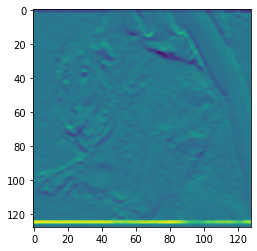

In [ ]:
plt.imshow(edge_features[9000])

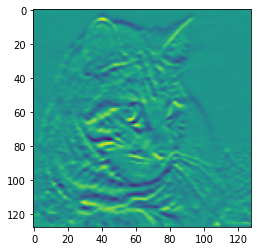

In [ ]:
plt.imshow(edge_features[7])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(np.array(edge_features).reshape(np.array(edge_features).shape[0],-1), lables,test_size=0.3, random_state=42)

In [ ]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)


# fit the model to the training set
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
%%time
print(knn.score(x_test, y_test))

0.4919047619047619
CPU times: user 1min 22s, sys: 577 ms, total: 1min 22s
Wall time: 58 s


###END OF NOTBOOK

In [ ]:
del edge_features
del x_train
del x_test
del y_train
del y_test

KNN does not elaborate attributes of specific class. It just finds difference on (lets say) every pixel value but not features. KNN works better on data having columns as attributes (Tabular data) in which every attribute defines a specific feature. but in image case, every pixel value do not define specific feature. Like human nose will lie on different pixel positions in different images. You should use deep learning for better results (CNN specifically).